# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 2.9MB/s eta 0:00:01
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

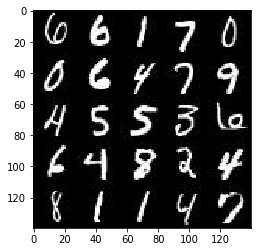

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

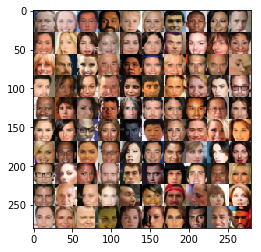

In [3]:
show_n_images = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import tensorflow as tf

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = 'input_real') # 3 dimensional data
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = 'input_z') # 1 dimensional data
    learning_rate = tf.placeholder(tf.float32, (None) ) # 0 dimension data just (None)
    return inputs_real, inputs_z , learning_rate 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse= reuse):# the out put variable name will all starts with 'discriminator'
        '''
        The input of a discriminator is real image, so here to implement a normal convolution nural network 
        images are data with dimension of 28 * 28 * 3
        
        ''' 
        x1 = tf.layers.conv2d(images, 64, 5, strides= 2, padding = 'same')
        # apply a reaky relu here
        x1 = tf.maximum(alpha * x1, x1)
        # now 14 * 14 
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides = 2, padding = 'same')
        x2 = tf.maximum(alpha * x2, x2)
        # now to 7 * 7
        
        x3 = tf.reshape(x2, (-1, 256 * 7 * 7))
        
        logits = tf.layers.dense(x3, 1)
        out_puts = tf.nn.sigmoid(logits)
        
    return out_puts, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    reuse = not is_train
    alpha=0.2
    with tf.variable_scope('generator', reuse=reuse):
        x = tf.layers.dense(z, 4*4*512)
        
        x = tf.reshape(x, (-1,4,4,512))
        x = tf.layers.batch_normalization(x,training=is_train)
        #x = tf.layers.dropout(x, 0.5)
        x = tf.maximum(alpha * x, x)
        #print(x.shape)
        x = tf.layers.conv2d_transpose(x, 256, 4, strides=1, padding="valid")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        #print(x.shape)
        x = tf.layers.conv2d_transpose(x, 128, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        #print(x.shape)
        x = tf.layers.conv2d_transpose(x, out_channel_dim, 4, strides=2, padding="same")
        #x = tf.maximum(alpha * x, x)

        logits = x
        out = tf.tanh(logits)
        #print(logits.shape)
        #print(out.shape)

    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [14]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    d_out_put_real, d_logits_real = discriminator(input_real, reuse=False)
    g_out_put = generator(input_z, out_channel_dim, is_train=True)
    d_logits_fake = discriminator(g_out_put, reuse=True)
    #print(input_real)
    #print(input_z)
    #print(d_logits_real.shape)
    #print(d_logits_fake)
    # Calculate losses
    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                              labels=tf.ones_like(d_logits_real)))
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                              labels=tf.zeros_like(d_logits_fake)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
                 tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                         labels=tf.ones_like(d_logits_fake)))
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [15]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables() # get all the trainable variables in the network
    g_vars = [var for var in t_vars if var.name.startswith('generator')] # generator associated variables 
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')] # discriminator associated variables
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS) 
    
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [16]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [17]:
import time

In [18]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    inputs_real, inputs_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, data_shape[-1])
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    step = 0 
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                start_time = time.time()
                step = step+1
                batch_images = batch_images * 2
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                #print('batch_z shape=',batch_z.shape)
                # Run optimizers
                _ = sess.run(d_train_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z, lr:learning_rate})
                _ = sess.run(g_train_opt, feed_dict={inputs_z: batch_z, lr:learning_rate})
                
                if step % 100 == 0:
                    train_loss_d = d_loss.eval({inputs_z:batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z:batch_z})
                    print("Epoch {}/{} Step {}...".format(epoch_i+1, epoch_count, step),
                      "Discriminator Loss: {:.4f}...".format(train_loss_d),
                      "Generator Loss: {:.4f}".format(train_loss_g),
                      "... Time spent={:.4f}".format(time.time() - start_time))    

                if step % 200 == 0:
                    show_generator_output(sess, 25, inputs_z, data_shape[3], data_image_mode)
                
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/10 Step 100... Discriminator Loss: 1.4921... Generator Loss: 0.4082 ... Time spent=0.1733
Epoch 1/10 Step 200... Discriminator Loss: 1.2941... Generator Loss: 0.4880 ... Time spent=0.1495


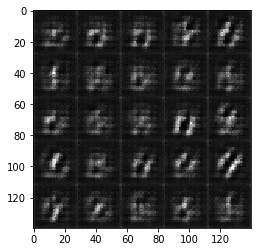

Epoch 1/10 Step 300... Discriminator Loss: 1.5168... Generator Loss: 0.3863 ... Time spent=0.1496
Epoch 1/10 Step 400... Discriminator Loss: 1.4617... Generator Loss: 0.4542 ... Time spent=0.1482


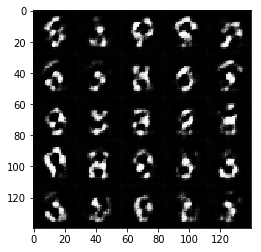

Epoch 1/10 Step 500... Discriminator Loss: 1.4471... Generator Loss: 0.4923 ... Time spent=0.1535
Epoch 1/10 Step 600... Discriminator Loss: 1.4752... Generator Loss: 0.4176 ... Time spent=0.1480


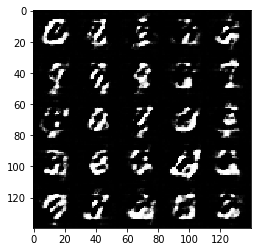

Epoch 2/10 Step 700... Discriminator Loss: 1.4756... Generator Loss: 0.5438 ... Time spent=0.1520
Epoch 2/10 Step 800... Discriminator Loss: 1.4362... Generator Loss: 0.4723 ... Time spent=0.1509


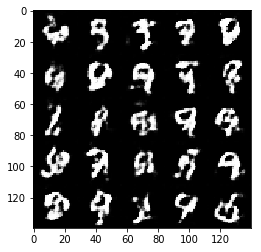

Epoch 2/10 Step 900... Discriminator Loss: 1.4333... Generator Loss: 0.4717 ... Time spent=0.1495
Epoch 2/10 Step 1000... Discriminator Loss: 1.4772... Generator Loss: 0.5199 ... Time spent=0.1509


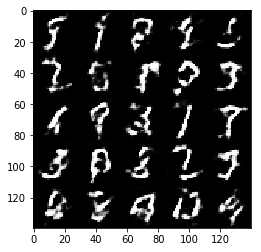

Epoch 2/10 Step 1100... Discriminator Loss: 1.4812... Generator Loss: 0.4381 ... Time spent=0.1515
Epoch 2/10 Step 1200... Discriminator Loss: 1.4895... Generator Loss: 0.4087 ... Time spent=0.1515


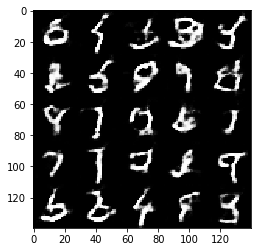

Epoch 3/10 Step 1300... Discriminator Loss: 1.5029... Generator Loss: 0.5034 ... Time spent=0.1491
Epoch 3/10 Step 1400... Discriminator Loss: 1.4769... Generator Loss: 0.4741 ... Time spent=0.1506


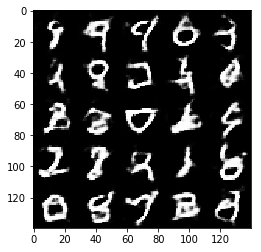

Epoch 3/10 Step 1500... Discriminator Loss: 1.4853... Generator Loss: 0.4430 ... Time spent=0.1491
Epoch 3/10 Step 1600... Discriminator Loss: 1.4805... Generator Loss: 0.4502 ... Time spent=0.1488


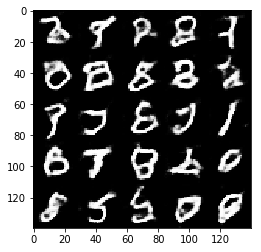

Epoch 3/10 Step 1700... Discriminator Loss: 1.4767... Generator Loss: 0.4957 ... Time spent=0.1490
Epoch 3/10 Step 1800... Discriminator Loss: 1.4751... Generator Loss: 0.4650 ... Time spent=0.1516


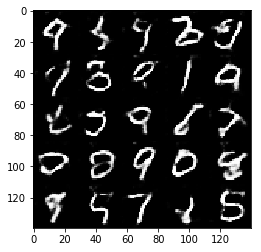

Epoch 4/10 Step 1900... Discriminator Loss: 1.4687... Generator Loss: 0.4759 ... Time spent=0.1475
Epoch 4/10 Step 2000... Discriminator Loss: 1.4725... Generator Loss: 0.4738 ... Time spent=0.1462


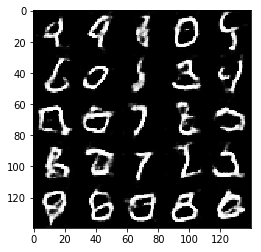

Epoch 4/10 Step 2100... Discriminator Loss: 1.4706... Generator Loss: 0.4314 ... Time spent=0.1496
Epoch 4/10 Step 2200... Discriminator Loss: 1.4785... Generator Loss: 0.4801 ... Time spent=0.1504


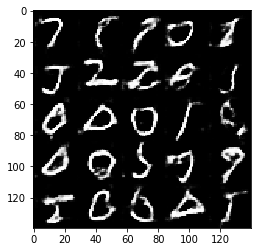

Epoch 4/10 Step 2300... Discriminator Loss: 1.4743... Generator Loss: 0.4757 ... Time spent=0.1478
Epoch 4/10 Step 2400... Discriminator Loss: 1.4642... Generator Loss: 0.4773 ... Time spent=0.1526


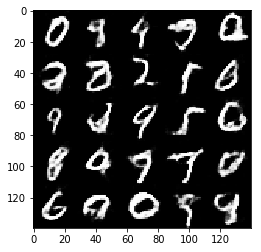

Epoch 5/10 Step 2500... Discriminator Loss: 1.4685... Generator Loss: 0.4958 ... Time spent=0.1471
Epoch 5/10 Step 2600... Discriminator Loss: 1.4608... Generator Loss: 0.4704 ... Time spent=0.1470


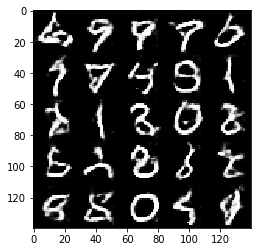

Epoch 5/10 Step 2700... Discriminator Loss: 1.4720... Generator Loss: 0.4779 ... Time spent=0.1538
Epoch 5/10 Step 2800... Discriminator Loss: 1.4691... Generator Loss: 0.4860 ... Time spent=0.1509


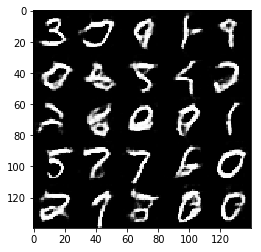

Epoch 5/10 Step 2900... Discriminator Loss: 1.4638... Generator Loss: 0.4665 ... Time spent=0.1475
Epoch 5/10 Step 3000... Discriminator Loss: 1.4518... Generator Loss: 0.4761 ... Time spent=0.1472


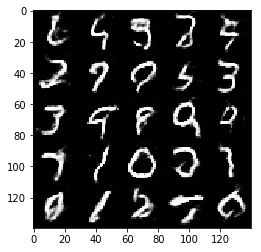

Epoch 6/10 Step 3100... Discriminator Loss: 1.4555... Generator Loss: 0.4930 ... Time spent=0.1510
Epoch 6/10 Step 3200... Discriminator Loss: 1.4637... Generator Loss: 0.4712 ... Time spent=0.1503


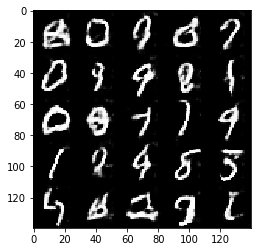

Epoch 6/10 Step 3300... Discriminator Loss: 1.4567... Generator Loss: 0.4680 ... Time spent=0.1530
Epoch 6/10 Step 3400... Discriminator Loss: 1.4755... Generator Loss: 0.4804 ... Time spent=0.1497


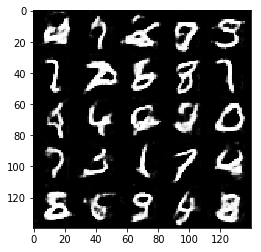

Epoch 6/10 Step 3500... Discriminator Loss: 1.4938... Generator Loss: 0.4759 ... Time spent=0.1478
Epoch 6/10 Step 3600... Discriminator Loss: 1.4714... Generator Loss: 0.4295 ... Time spent=0.1476


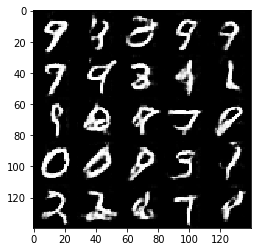

Epoch 7/10 Step 3700... Discriminator Loss: 1.4949... Generator Loss: 0.4998 ... Time spent=0.1521
Epoch 7/10 Step 3800... Discriminator Loss: 1.4657... Generator Loss: 0.4899 ... Time spent=0.1513


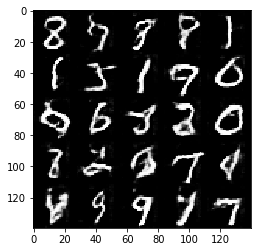

Epoch 7/10 Step 3900... Discriminator Loss: 1.4688... Generator Loss: 0.4631 ... Time spent=0.1549
Epoch 7/10 Step 4000... Discriminator Loss: 1.4779... Generator Loss: 0.4077 ... Time spent=0.1485


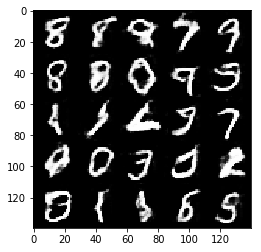

Epoch 7/10 Step 4100... Discriminator Loss: 1.4729... Generator Loss: 0.4586 ... Time spent=0.1502
Epoch 7/10 Step 4200... Discriminator Loss: 1.4827... Generator Loss: 0.4909 ... Time spent=0.1478


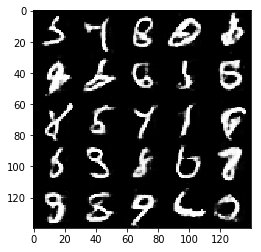

Epoch 8/10 Step 4300... Discriminator Loss: 1.4859... Generator Loss: 0.5136 ... Time spent=0.1513
Epoch 8/10 Step 4400... Discriminator Loss: 1.4672... Generator Loss: 0.4720 ... Time spent=0.1510


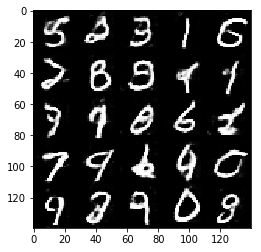

Epoch 8/10 Step 4500... Discriminator Loss: 1.4705... Generator Loss: 0.4434 ... Time spent=0.1512


KeyboardInterrupt: 

In [21]:
batch_size = 100
z_dim = 100
learning_rate = 0.0001
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/10 Step 100... Discriminator Loss: 0.7784... Generator Loss: 0.9202 ... Time spent=0.1795
Epoch 1/10 Step 200... Discriminator Loss: 1.3008... Generator Loss: 0.5086 ... Time spent=0.1464


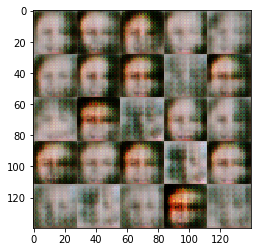

Epoch 1/10 Step 300... Discriminator Loss: 1.4123... Generator Loss: 0.5528 ... Time spent=0.1473
Epoch 1/10 Step 400... Discriminator Loss: 1.5303... Generator Loss: 0.3457 ... Time spent=0.1472


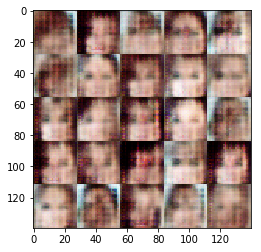

Epoch 1/10 Step 500... Discriminator Loss: 1.4588... Generator Loss: 0.4670 ... Time spent=0.1462
Epoch 1/10 Step 600... Discriminator Loss: 1.3672... Generator Loss: 0.6811 ... Time spent=0.1463


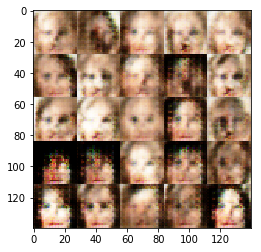

Epoch 1/10 Step 700... Discriminator Loss: 1.4621... Generator Loss: 0.4720 ... Time spent=0.1501
Epoch 1/10 Step 800... Discriminator Loss: 1.3827... Generator Loss: 0.5912 ... Time spent=0.1487


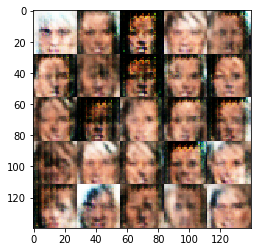

Epoch 1/10 Step 900... Discriminator Loss: 1.5531... Generator Loss: 0.5459 ... Time spent=0.1487
Epoch 1/10 Step 1000... Discriminator Loss: 1.3299... Generator Loss: 0.5351 ... Time spent=0.1515


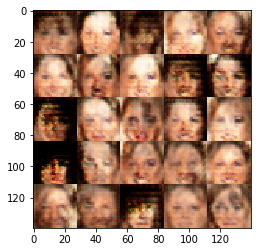

Epoch 1/10 Step 1100... Discriminator Loss: 1.4662... Generator Loss: 0.4873 ... Time spent=0.1498
Epoch 1/10 Step 1200... Discriminator Loss: 1.5005... Generator Loss: 0.4464 ... Time spent=0.1492


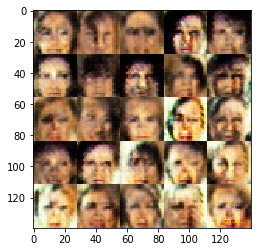

Epoch 1/10 Step 1300... Discriminator Loss: 1.2977... Generator Loss: 0.4906 ... Time spent=0.1469
Epoch 1/10 Step 1400... Discriminator Loss: 1.2836... Generator Loss: 0.6100 ... Time spent=0.1482


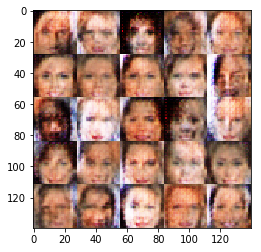

Epoch 1/10 Step 1500... Discriminator Loss: 1.5644... Generator Loss: 0.3940 ... Time spent=0.1473
Epoch 1/10 Step 1600... Discriminator Loss: 1.5292... Generator Loss: 0.5641 ... Time spent=0.1524


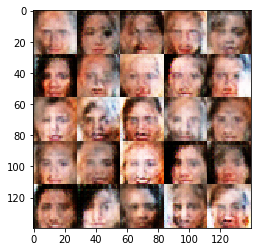

Epoch 1/10 Step 1700... Discriminator Loss: 1.4258... Generator Loss: 0.5717 ... Time spent=0.1517
Epoch 1/10 Step 1800... Discriminator Loss: 1.4749... Generator Loss: 0.5116 ... Time spent=0.1469


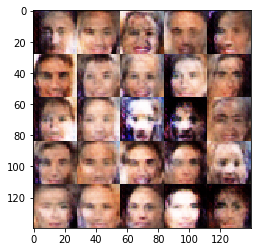

Epoch 1/10 Step 1900... Discriminator Loss: 1.3314... Generator Loss: 0.4689 ... Time spent=0.1497
Epoch 1/10 Step 2000... Discriminator Loss: 1.5339... Generator Loss: 0.6831 ... Time spent=0.1470


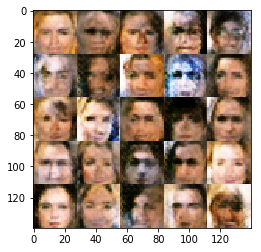

Epoch 2/10 Step 2100... Discriminator Loss: 1.8055... Generator Loss: 0.9341 ... Time spent=0.1491
Epoch 2/10 Step 2200... Discriminator Loss: 1.4928... Generator Loss: 0.3586 ... Time spent=0.1494


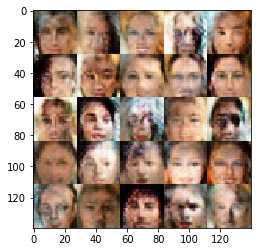

Epoch 2/10 Step 2300... Discriminator Loss: 1.4792... Generator Loss: 0.4733 ... Time spent=0.1526
Epoch 2/10 Step 2400... Discriminator Loss: 1.3256... Generator Loss: 0.4781 ... Time spent=0.1486


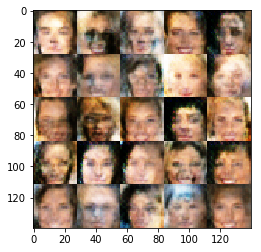

Epoch 2/10 Step 2500... Discriminator Loss: 1.4663... Generator Loss: 0.5036 ... Time spent=0.1467
Epoch 2/10 Step 2600... Discriminator Loss: 1.3939... Generator Loss: 0.5405 ... Time spent=0.1510


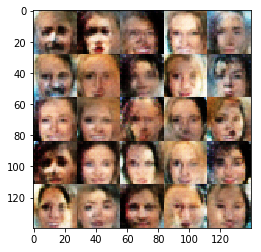

Epoch 2/10 Step 2700... Discriminator Loss: 1.4735... Generator Loss: 0.4985 ... Time spent=0.1489
Epoch 2/10 Step 2800... Discriminator Loss: 1.4733... Generator Loss: 0.4661 ... Time spent=0.1507


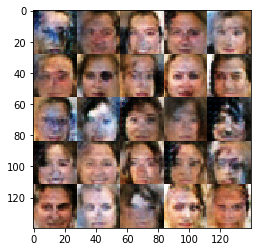

Epoch 2/10 Step 2900... Discriminator Loss: 1.5839... Generator Loss: 0.4489 ... Time spent=0.1476
Epoch 2/10 Step 3000... Discriminator Loss: 1.4627... Generator Loss: 0.5434 ... Time spent=0.1544


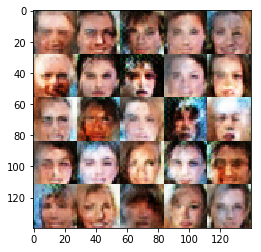

Epoch 2/10 Step 3100... Discriminator Loss: 1.3398... Generator Loss: 0.5201 ... Time spent=0.1493
Epoch 2/10 Step 3200... Discriminator Loss: 1.4280... Generator Loss: 0.4867 ... Time spent=0.1494


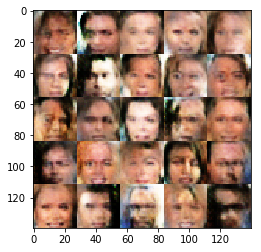

Epoch 2/10 Step 3300... Discriminator Loss: 1.5033... Generator Loss: 0.6222 ... Time spent=0.1510
Epoch 2/10 Step 3400... Discriminator Loss: 1.4119... Generator Loss: 0.5068 ... Time spent=0.1507


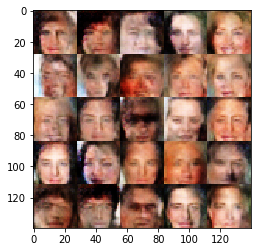

Epoch 2/10 Step 3500... Discriminator Loss: 1.5023... Generator Loss: 0.3612 ... Time spent=0.1481
Epoch 2/10 Step 3600... Discriminator Loss: 1.3952... Generator Loss: 0.4425 ... Time spent=0.1515


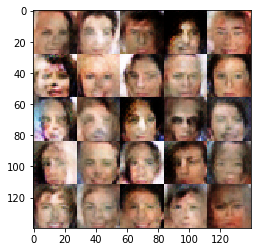

Epoch 2/10 Step 3700... Discriminator Loss: 1.3551... Generator Loss: 0.5128 ... Time spent=0.1493
Epoch 2/10 Step 3800... Discriminator Loss: 1.5152... Generator Loss: 0.3548 ... Time spent=0.1521


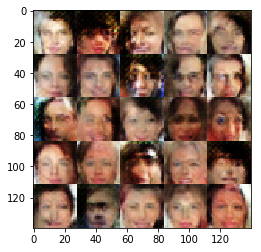

Epoch 2/10 Step 3900... Discriminator Loss: 1.5023... Generator Loss: 0.4685 ... Time spent=0.1514
Epoch 2/10 Step 4000... Discriminator Loss: 1.3736... Generator Loss: 0.4436 ... Time spent=0.1491


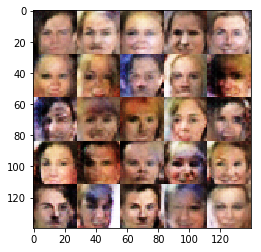

Epoch 3/10 Step 4100... Discriminator Loss: 1.4013... Generator Loss: 0.5005 ... Time spent=0.1523
Epoch 3/10 Step 4200... Discriminator Loss: 1.5692... Generator Loss: 0.4372 ... Time spent=0.1551


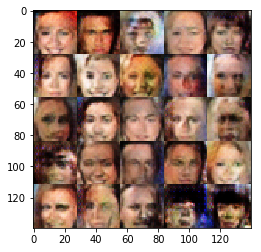

Epoch 3/10 Step 4300... Discriminator Loss: 1.4493... Generator Loss: 0.4008 ... Time spent=0.1478
Epoch 3/10 Step 4400... Discriminator Loss: 1.3649... Generator Loss: 0.4141 ... Time spent=0.1510


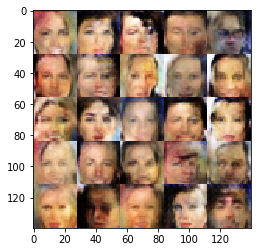

Epoch 3/10 Step 4500... Discriminator Loss: 1.4246... Generator Loss: 0.5518 ... Time spent=0.1487
Epoch 3/10 Step 4600... Discriminator Loss: 1.3664... Generator Loss: 0.5249 ... Time spent=0.1486


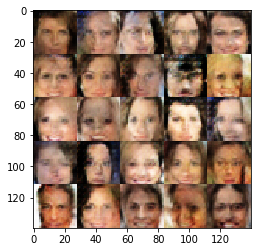

Epoch 3/10 Step 4700... Discriminator Loss: 1.4476... Generator Loss: 0.5112 ... Time spent=0.1494
Epoch 3/10 Step 4800... Discriminator Loss: 1.4090... Generator Loss: 0.4433 ... Time spent=0.1508


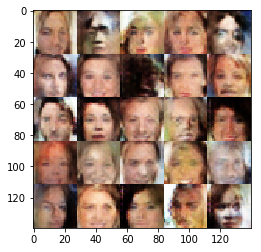

Epoch 3/10 Step 4900... Discriminator Loss: 1.5555... Generator Loss: 0.5322 ... Time spent=0.1531
Epoch 3/10 Step 5000... Discriminator Loss: 1.4717... Generator Loss: 0.4039 ... Time spent=0.1491


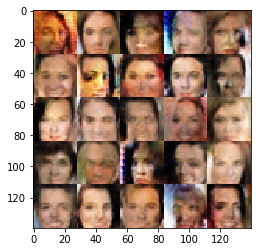

Epoch 3/10 Step 5100... Discriminator Loss: 1.4466... Generator Loss: 0.3567 ... Time spent=0.1510
Epoch 3/10 Step 5200... Discriminator Loss: 1.4638... Generator Loss: 0.4983 ... Time spent=0.1506


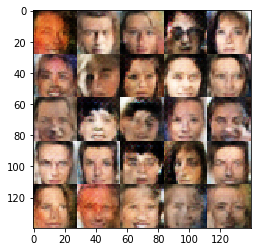

Epoch 3/10 Step 5300... Discriminator Loss: 1.5075... Generator Loss: 0.5048 ... Time spent=0.1510
Epoch 3/10 Step 5400... Discriminator Loss: 1.4125... Generator Loss: 0.4842 ... Time spent=0.1492


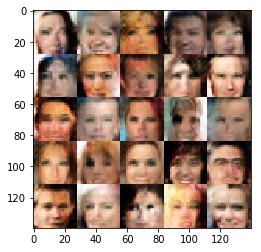

Epoch 3/10 Step 5500... Discriminator Loss: 1.5092... Generator Loss: 0.3715 ... Time spent=0.1489
Epoch 3/10 Step 5600... Discriminator Loss: 1.4938... Generator Loss: 0.4398 ... Time spent=0.1505


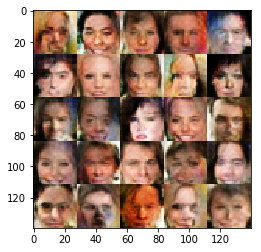

Epoch 3/10 Step 5700... Discriminator Loss: 1.4928... Generator Loss: 0.5855 ... Time spent=0.1488
Epoch 3/10 Step 5800... Discriminator Loss: 1.4927... Generator Loss: 0.4975 ... Time spent=0.1487


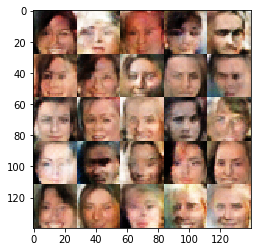

Epoch 3/10 Step 5900... Discriminator Loss: 1.4253... Generator Loss: 0.4740 ... Time spent=0.1540
Epoch 3/10 Step 6000... Discriminator Loss: 1.4227... Generator Loss: 0.4763 ... Time spent=0.1557


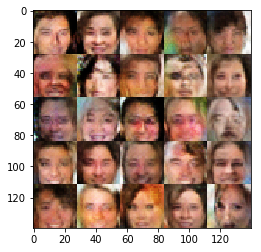

Epoch 4/10 Step 6100... Discriminator Loss: 1.4699... Generator Loss: 0.5142 ... Time spent=0.1490
Epoch 4/10 Step 6200... Discriminator Loss: 1.4457... Generator Loss: 0.4014 ... Time spent=0.1531


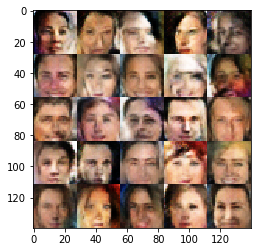

In [ ]:
batch_size = 100
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 10

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。